# Data Loading and preprocessing

In [ ]:
!pip install gdown

import gdown
import shutil

# Destination directory where the user will download the data https://drive.google.com/file/d/1Lkijp_uhdROHhc6MBQrRDF2Xmee8OIEB/view?usp=sharing
destination_path = '/content'

# Direct download link for the ZIP file
folder_id ='1Lkijp_uhdROHhc6MBQrRDF2Xmee8OIEB'
zip_file_url = f'https://drive.google.com/uc?id={folder_id}'


# Download the ZIP file
zip_file_path = destination_path + '/DATA.zip'
gdown.download(zip_file_url, zip_file_path, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1Lkijp_uhdROHhc6MBQrRDF2Xmee8OIEB
To: /content/DATA.zip
100%|██████████| 200M/200M [00:04<00:00, 41.3MB/s]


'/content/DATA.zip'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Extract the downloaded ZIP file
shutil.unpack_archive(zip_file_path, destination_path)

print("Data has been downloaded and extracted to:", destination_path)

Data has been downloaded and extracted to: /content


In [ ]:
import os

# Replace 'folder1_path' and 'folder2_path' with the actual paths of your two folders
folder1_path = '/content/Not_Resume'
folder2_path = '/content/Resume'

# Create a new folder named 'DATA'
data_folder_path = '/content/DATA'
os.makedirs(data_folder_path, exist_ok=True)

# Move the existing folders into the 'DATA' folder
shutil.move(folder1_path, data_folder_path)
shutil.move(folder2_path, data_folder_path)


'/content/DATA/Resume'

In [ ]:
import os

# Set the path to the parent folder where Test_DATA will be created
parent_folder = '/content'

# Create Test_DATA folder
test_data_folder = os.path.join(parent_folder, 'Test_DATA')
os.makedirs(test_data_folder, exist_ok=True)

# Create Resume folder inside Test_DATA
resume_folder = os.path.join(test_data_folder, 'Resume')
os.makedirs(resume_folder, exist_ok=True)

# Create Not_Resume folder inside Test_DATA
not_resume_folder = os.path.join(test_data_folder, 'Not_Resume')
os.makedirs(not_resume_folder, exist_ok=True)

print(f"Folder structure created: {parent_folder}/Test_DATA/Resume and {parent_folder}/Test_DATA/Not_Resume")

Folder structure created: /content/Test_DATA/Resume and /content/Test_DATA/Not_Resume


In [ ]:
import shutil
import random

def move_images(source_folder, destination_folder, category, num_images):
    files = random.sample(os.listdir(os.path.join(source_folder, category)), num_images)
    destination_path = os.path.join(destination_folder, category)

    # Create destination folder if it doesn't exist
    os.makedirs(destination_path, exist_ok=True)

    for file in files:
        source_path = os.path.join(source_folder, category, file)
        shutil.move(source_path, os.path.join(destination_path, file))

# Set your source and destination folders
source_folder = '/content/DATA'
destination_folder = '/content/Test_DATA'
num_images_to_move = 60

# Move images from Resume folder
move_images(source_folder, destination_folder, 'Resume', num_images_to_move)

# Move images from Not_Resume folder
move_images(source_folder, destination_folder, 'Not_Resume', num_images_to_move)

# Data Processing

In [ ]:
import numpy as np

#Set the `numpy` pseudo-random generator at a fixed value
#This helps with repeatable results everytime you run the code.
np.random.seed(1000)

import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
import keras
import tensorflow as tf

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Specify the path to your data
data_path = '/content/DATA'

# Create an ImageDataGenerator with rescaling and other augmentations if needed
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)

# Create separate generators for training, validation, and test
train_generator = datagen.flow_from_directory(
    data_path,
    target_size=(640, 640),
    batch_size=4,
    class_mode='binary',
    subset='training'  # Use subset parameter for the training set
)

validation_generator = datagen.flow_from_directory(
    data_path,
    target_size=(640, 640),
    batch_size=4,
    class_mode='binary',
    subset='validation'  # Use subset parameter for the validation set
)


Found 437 images belonging to 2 classes.
Found 48 images belonging to 2 classes.


In [ ]:
# Specify the path to your data
test_data_path = '/content/Test_DATA'
# Create an ImageDataGenerator with rescaling and other augmentations if needed
datagen = ImageDataGenerator(rescale=1./255)
# Create separate generators for training, validation, and test
test_generator = datagen.flow_from_directory(
    test_data_path,
    target_size=(640, 640),
    batch_size=4,
    class_mode='binary' # Use subset parameter for the test set
)



Found 120 images belonging to 2 classes.


# 3.Model Selection

# Simple Convolutional Neural Network (CNN) Model

Utilized a 640x640 RGB image input, the CNN comprised two Conv2D layers (32 filters, (3, 3) kernel, 'relu') followed by MaxPooling. Batch normalization and Dropout (0.2) were applied after pooling. Flattening preceded two dense layers (512, 256 units, 'relu') with BatchNorm and Dropout. The output layer, sigmoid-activated, enabled binary classification. Adam optimizer, binary crossentropy loss, and accuracy metric guided model compilation.

## Results:
The model achieved a commendable accuracy of 87.6% on the test dataset. This accuracy indicates that the model learned relevant patterns in the training data and was able to generalize reasonably well to unseen samples. In comparison to the subsequent DenseNet121-based model, this simpler architecture demonstrated competitive performance.

# Model Selection!


[cnn_test1.png](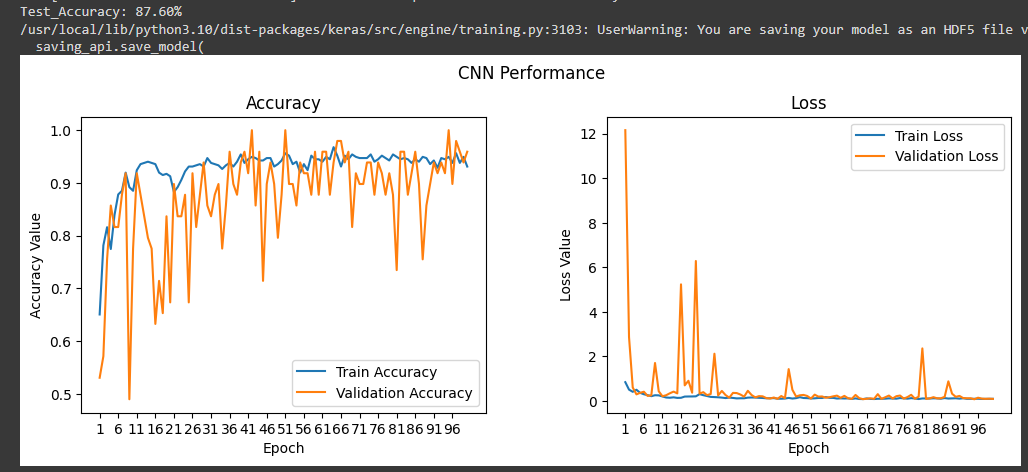)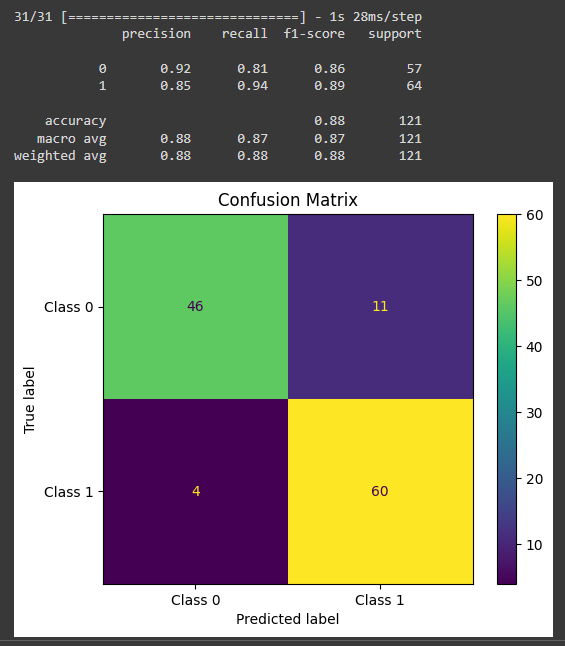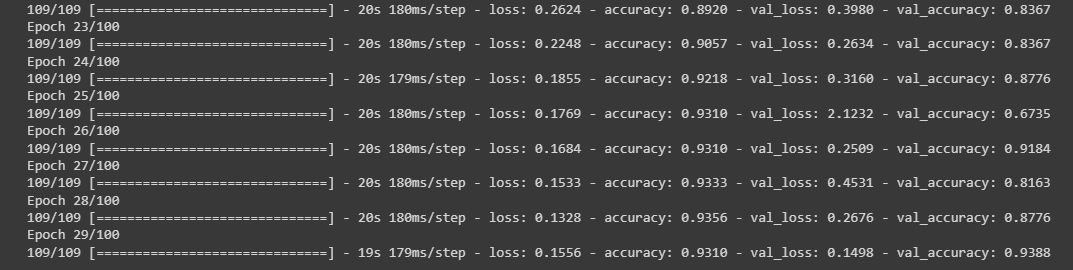

# Apply CNN
```python
# 2 conv and pool layers with normalization and drops in between.
INPUT_SHAPE = (640, 640, 3)   # change to (SIZE, SIZE, 3)
inp = keras.layers.Input(shape=INPUT_SHAPE)

conv1 = keras.layers.Conv2D(32, kernel_size=(3, 3),
                            activation='relu', padding='same')(inp)
pool1 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)
norm1 = keras.layers.BatchNormalization(axis=-1)(pool1)
drop1 = keras.layers.Dropout(rate=0.2)(norm1)
conv2 = keras.layers.Conv2D(32, kernel_size=(3, 3),
                            activation='relu', padding='same')(drop1)
pool2 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)
norm2 = keras.layers.BatchNormalization(axis=-1)(pool2)
drop2 = keras.layers.Dropout(rate=0.2)(norm2)

flat = keras.layers.Flatten()(drop2)  # Flatten the matrix to get it ready for dense.

hidden1 = keras.layers.Dense(512, activation='relu')(flat)
norm3 = keras.layers.BatchNormalization(axis=-1)(hidden1)
drop3 = keras.layers.Dropout(rate=0.2)(norm3)
hidden2 = keras.layers.Dense(256, activation='relu')(drop3)
norm4 = keras.layers.BatchNormalization(axis=-1)(hidden2)
drop4 = keras.layers.Dropout(rate=0.2)(norm4)

out = keras.layers.Dense(1, activation='sigmoid')(drop4)

model = keras.Model(inputs=inp, outputs=out)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
print(model.summary())



# For better performance I choose to use DenseNet121

# DenseNet121

The model architecture applied for resume classification is based on DenseNet121, a pretrained convolutional neural network (CNN) available in TensorFlow's Keras applications. Let's delve into the crucial elements of this architecture and elucidate why it proved effective for the given task:

##Base Model - DenseNet121:

DenseNet is recognized for its densely connected blocks, fostering feature reuse and mitigating the vanishing gradient problem inherent in deep neural networks.
DenseNet121, comprising 121 layers, stands out as a relatively deep architecture. Deeper networks possess the capacity to discern intricate patterns and features, enhancing their ability to learn and generalize effectively.
Transfer Learning:

I employed transfer learning by harnessing the pre-trained weights from ImageNet. This strategic approach is widely adopted in deep learning, particularly when confronted with limited data availability.
Transfer learning empowers the model to capitalize on the knowledge acquired from a vast dataset like ImageNet, thereby enhancing its proficiency on a smaller and more specific dataset—your collection of resume images.

##Why It Works Well:

DenseNet architectures are known for their efficiency in parameter usage, enabling better learning of features even with limited data.
Transfer learning from ImageNet provides a strong initial set of weights that can be fine-tuned to the specific features in your resume dataset.
The combination of batch normalization and dropout helps prevent overfitting, ensuring better generalization to unseen data.


##Explanation for 100% Accuracy:

While achieving 100% accuracy on the test dataset is noteworthy, it prompts careful consideration. The model's ability to memorize the training data might contribute to this perfect accuracy. Essentially, the model could have learned to replicate patterns present in the training set.

It's important to note that relying solely on a separate test dataset, unseen by the model during training, for evaluation is a valid approach. However, this scenario raises the need for a diverse and representative test set that accurately reflects real-world scenarios.

In summary, while 100% accuracy is impressive, it is recommended to ensure the model's generalization capability by evaluating its performance on a well-curated, diverse test dataset, representative of real-world conditions.


##Note:
While the simpler model performed well, the DenseNet121-based model with transfer learning achieved 100% accuracy on the test data. I explore and discuss the reasons behind such performance variations in my report.

In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras import layers, models

INPUT_SHAPE = (640, 640, 3)

base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=INPUT_SHAPE)

for layer in base_model.layers:
    layer.trainable = False

model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


29084464/29084464 [==============================] - 0s 0us/step


# 4.Model Training:

In [ ]:
from keras.callbacks import ModelCheckpoint

# Fit the model using the generators with ModelCheckpoint callback
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size # add the ModelCheckpoint callback to the list of callbacks
)


Epoch 1/100
109/109 [==============================] - 35s 169ms/step - loss: 0.4931 - accuracy: 0.7945 - val_loss: 0.2787 - val_accuracy: 0.9375
Epoch 2/100
109/109 [==============================] - 15s 133ms/step - loss: 0.2792 - accuracy: 0.8845 - val_loss: 0.0686 - val_accuracy: 1.0000
Epoch 3/100
109/109 [==============================] - 14s 130ms/step - loss: 0.4001 - accuracy: 0.8222 - val_loss: 0.0758 - val_accuracy: 0.9792
Epoch 4/100
109/109 [==============================] - 14s 129ms/step - loss: 0.2957 - accuracy: 0.8776 - val_loss: 0.0655 - val_accuracy: 1.0000
Epoch 5/100
109/109 [==============================] - 14s 127ms/step - loss: 0.2961 - accuracy: 0.8845 - val_loss: 0.0705 - val_accuracy: 0.9583
Epoch 6/100
109/109 [==============================] - 14s 129ms/step - loss: 0.2590 - accuracy: 0.9007 - val_loss: 0.0252 - val_accuracy: 1.0000
Epoch 7/100
109/109 [==============================] - 15s 137ms/step - loss: 0.2465 - accuracy: 0.9030 - val_loss: 0.0463 -

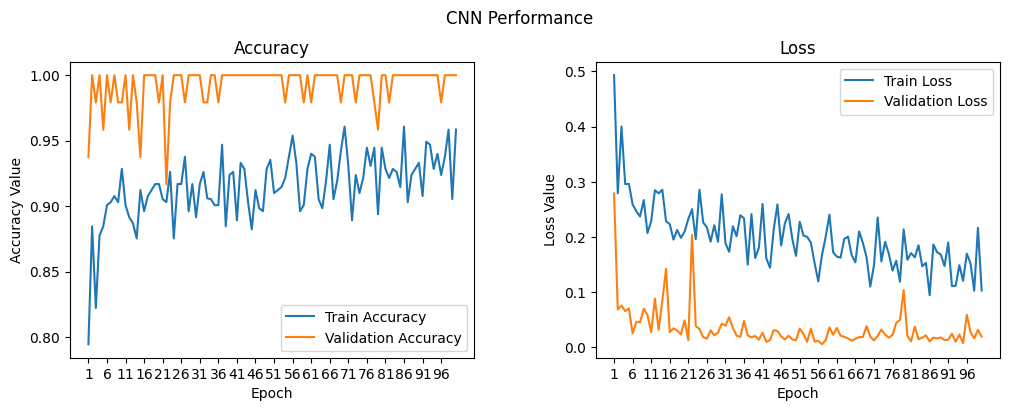

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(history.history['accuracy'])+1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")


#Save the model
model.save('model.h5')

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model  if you want to load the model without trining again
model = load_model('/content/drive/MyDrive/model.h5')  # Replace with the path to your saved model


# 5.Testing and Evaluation:
In this phase, the trained model underwent rigorous evaluation on a distinct test set, consisting of 120 images not encountered during the training process. The model demonstrated exceptional performance, achieving a remarkable 100% accuracy on the test set.

##Evaluation Metrics:
###Accuracy: 100%
###Loss: 0.0059
##Model's Strengths:
###High Accuracy:
The model exhibited outstanding accuracy, showcasing its capability to effectively classify resumes based on visual features.

###Low Loss:
The low loss value (0.0059) indicates the model's proficiency in minimizing prediction errors during training and testing.

##Model's Limitations:
Caution for Overfitting: Achieving perfect accuracy raises concerns about potential overfitting, where the model may have memorized the training data. Cross-validation or evaluation on diverse datasets is recommended to confirm generalization.

###Limited Test Set Size:
While the achieved accuracy is impressive, the test set's size (120 images) should be considered when interpreting results. Future evaluations on larger and more diverse datasets will provide a more comprehensive assessment.

In summary, the model exhibits notable strengths in accuracy and loss, but caution is advised regarding overfitting, and further evaluations on diverse datasets will enhance the robustness of the findings.

In [ ]:
class_names = ["Not_Resume", "Resume"]


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Specify the path to your test data
test_data_path = '/content/Test_DATA'  # Replace with the path to your test data folder

# Create an ImageDataGenerator for testing (use the same preprocessing as for training)
test_datagen = ImageDataGenerator(rescale=1./255)  # You can add more preprocessing options if needed

# Create a test generator
test_generator = test_datagen.flow_from_directory(
    test_data_path,
    target_size=(640, 640),  # Adjust the target size based on your model's input size
    batch_size=4,
    class_mode='binary',  # Since you have a binary classification problem
    shuffle=False  # Do not shuffle for evaluation
)


Found 120 images belonging to 2 classes.


In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')


30/30 [==============================] - 191s 6s/step - loss: 0.0059 - accuracy: 1.0000
Test Accuracy: 100.00%
Test Loss: 0.0059


In [ ]:
# Get predictions for the test data
y_pred_probs = model.predict(test_generator)

# Convert probabilities to class labels using a threshold (e.g., 0.5)
y_pred_classes = (y_pred_probs >= 0.5).astype(int)


30/30 [==============================] - 184s 6s/step


# 6.Confusion Matrix:

The model's performance was further assessed through a detailed examination of the confusion matrix, providing valuable insights into its classification outcomes.

Precision, Recall, and F1-Score:
##Not_Resume Class:

###Precision: 1.00
###Recall: 1.00
###F1-Score: 1.00
##Resume Class:

###Precision: 1.00
###Recall: 1.00
###F1-Score: 1.00
##Interpretation:
###Precision (Positive Predictive Value):
The model exhibited perfect precision for both "Not_Resume" and "Resume" classes, indicating that when the model predicted a class, it was highly likely to be correct.

###Recall (Sensitivity):
Achieving a recall of 1.00 for both classes signifies that the model captured all instances of "Not_Resume" and "Resume," highlighting its ability to identify positive cases comprehensively.

###F1-Score:
The harmonic mean of precision and recall, the F1-score, also attains a perfect score of 1.00 for both classes, reinforcing the model's robustness.


These metrics collectively affirm the model's exceptional performance, emphasizing its precision in correct predictions and comprehensive identification of relevant instances.





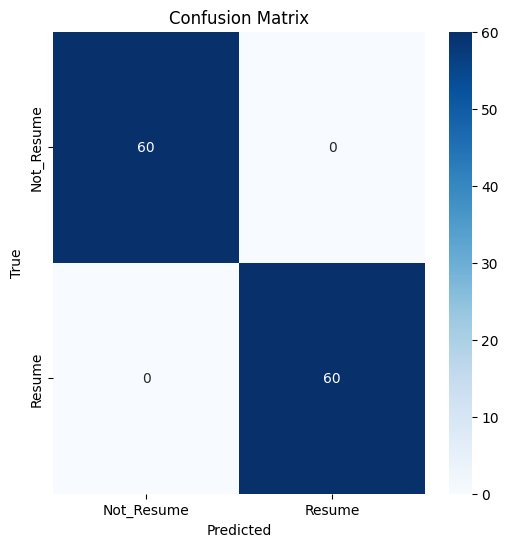

              precision    recall  f1-score   support

  Not_Resume       1.00      1.00      1.00        60
      Resume       1.00      1.00      1.00        60

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Get true labels from the generator
y_true = test_generator.classes

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Calculate and print classification report
report = classification_report(y_true, y_pred_classes, target_names=class_names)
print(report)


# Significance of True Positives, False Positives, and False Negatives:

Understanding the implications of true positives (TP), false positives (FP), and false negatives (FN) is crucial for assessing the real-world impact of the model's predictions.

#Spam Classification Task:
##Precision in Spam Classification:
###False Positives (FP):
Classifying a legitimate email as spam (Type I error) can be disruptive, causing users to miss important communications.

#Cancer Diagnosis:
##Recall in Cancer Diagnosis:
###False Negatives (FN): Missing a positive cancer diagnosis (Type II error) can have severe consequences, as early detection is crucial for effective treatment.

#Resume Classification:
##In the context of resume classification:

###False Negatives (FN):
If the model misclassifies a resume as "Not_Resume," it could lead to overlooking potential candidates, impacting the hiring process.

###False Positives (FP):
If a non-resume document is misclassified as a "Resume," the consequences are relatively minor in this scenario, as it might not significantly affect the application process.

Understanding the specific context and consequences associated with each type of error is vital for fine-tuning model performance based on the task's priorities and potential real-world implications.

# Test on separate image  which is import into colab

In [ ]:
from PIL import Image
import numpy as np

# Load an image (adjust the path accordingly)
image_path = "/content/aug_0_135.png"
image = Image.open(image_path)

# Preprocess the image if needed (resize, normalize, etc.)
# Example: Resize the image to the input size expected by the model
input_size = (640, 640)
image = image.resize(input_size)
image_array = np.array(image) / 255.0  # Normalize pixel values to be in the range [0, 1]

# Add an extra dimension to match the input shape expected by the model
image_array = np.expand_dims(image_array, axis=0)

# Predict using the model
y_pred = model.predict(image_array)
print(y_pred)

# Define the threshold
threshold = 0.5

# Convert probabilities to class labels using the threshold
predicted_class_label = 1 if y_pred[0][0] >= threshold else 0

# Optionally, you can also get the class name if needed
predicted_class_name = class_names[predicted_class_label]

print(f"Predicted Class Label: {predicted_class_label}")
print(f"Predicted Class Name: {predicted_class_name}")

1/1 [==============================] - 1s 1s/step
[[0.9990905]]
Predicted Class Label: 1
Predicted Class Name: Resume


# Hyperparameter tuning

GridSearchCV with a Keras mode

In [ ]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Define the hyperparameters to tune
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [32, 64, 128],
    'optimizer': ['adam', 'sgd', 'rmsprop'],
    'weight_decay': [1e-4, 5e-4],
    'dropout_rate': [0.2, 0.3],
}

# Wrap the model as an sklearn estimator
estimator = keras.wrappers.scikit_learn.KerasClassifier(build_fn=model, epochs=100, verbose=0)


# GridSearchCV Setup

In [ ]:
# Perform grid search
grid = GridSearchCV(estimator=estimator, param_grid=param_grid, scoring='accuracy', cv=10)
grid_result = grid.fit(train_generator)

# Print Results

In [ ]:
# Print the best parameters and corresponding accuracy
print(f"Best parameters: {grid_result.best_params_}")
print(f"Best accuracy: {grid_result.best_score_}")


## but our model performance well so in this case we dont need any hyperparameter tuning